In [1]:
data<-read.csv("home_audio_final")
summary(data)

   week_year       list_price    product_mrp        gmv           units      
 Min.   : 4.00   Min.   :1886   Min.   :3117   Min.   :1897   Min.   :1.001  
 1st Qu.:15.50   1st Qu.:2053   1st Qu.:3385   1st Qu.:2064   1st Qu.:1.005  
 Median :27.00   Median :2127   Median :3581   Median :2137   Median :1.007  
 Mean   :28.21   Mean   :2133   Mean   :3674   Mean   :2144   Mean   :1.007  
 3rd Qu.:41.50   3rd Qu.:2200   3rd Qu.:3844   3rd Qu.:2216   3rd Qu.:1.008  
 Max.   :53.00   Max.   :2384   Max.   :4651   Max.   :2397   Max.   :1.016  
      sla        promotional_offer     number       Total.Investment
 Min.   :4.332   Min.   :0.2972    Min.   :0.0000   Min.   : 17.08  
 1st Qu.:5.245   1st Qu.:0.3279    1st Qu.:0.0000   1st Qu.: 49.65  
 Median :5.623   Median :0.3465    Median :0.0000   Median : 72.79  
 Mean   :5.719   Mean   :0.3553    Mean   :0.7447   Mean   : 77.23  
 3rd Qu.:6.177   3rd Qu.:0.3789    3rd Qu.:1.5000   3rd Qu.:100.00  
 Max.   :7.412   Max.   :0.4483    Max. 

### Basic Linear Model

In [2]:
# Building the Baisc Linear regression Model
Linear_model <-data
Linear_model <- scale(Linear_model)
Linear_model <-data.frame(Linear_model)
model_1 <- lm(gmv~.,Linear_model)
print(summary(model_1))


Call:
lm(formula = gmv ~ ., data = Linear_model)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036865 -0.008959  0.001597  0.010476  0.028057 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.505e-15  4.327e-03   0.000  1.00000    
week_year               -1.909e-01  7.781e-02  -2.453  0.03405 *  
list_price               1.361e+00  2.033e-01   6.695  5.4e-05 ***
product_mrp             -8.172e-02  7.154e-02  -1.142  0.27992    
units                    3.850e-02  1.122e-02   3.430  0.00643 ** 
sla                     -1.345e-02  2.366e-02  -0.568  0.58234    
promotional_offer       -4.133e-02  2.342e-01  -0.176  0.86348    
number                   9.747e-03  1.184e-02   0.823  0.42963    
Total.Investment        -2.221e+00  7.221e-01  -3.076  0.01172 *  
TV                       8.249e-01  2.610e-01   3.160  0.01015 *  
Digital                 -8.108e-01  4.064e-01  -1.995  0.07400 .  
Sponsorship      

Model Selection

In [3]:
library(car)
library(MASS)

all_vifs <- vif(model_1)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Linear_model)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

##Final Model 
Linear_Final_model <- selectedMod
print(summary(Linear_Final_model))  




Call:
lm(formula = myForm, data = Linear_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80895 -0.45457 -0.02355  0.44193  1.38645 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.543e-15  1.144e-01   0.000  1.00000   
week_year                1.213e-02  1.414e-01   0.086  0.93215   
units                    2.046e-01  1.455e-01   1.406  0.16942   
sla                     -2.806e-01  1.395e-01  -2.011  0.05279 . 
number                   1.717e-01  1.360e-01   1.262  0.21593   
TV                      -2.792e-01  1.409e-01  -1.981  0.05619 . 
product_procurement_sla -2.396e-02  1.471e-01  -0.163  0.87166   
Middle_p                -1.813e-01  1.344e-01  -1.348  0.18701   
Premium_p                6.469e-02  1.294e-01   0.500  0.62054   
inc_PO_MA3               2.299e-01  1.412e-01   1.628  0.11341   
list_price.1             4.120e-01  1.471e-01   2.801  0.00858 **
list_price.2             2.840e-02  1.57

k-fold Cross Validation

In [4]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data = Linear_model, method = "lm",
               trControl = train.control)
# Summarize the results
print(cross_val)


Loading required package: lattice
Loading required package: ggplot2


Linear Regression 

47 samples
14 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 42, 42, 41, 43, 41, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9904016  0.4858062  0.8663987

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

                  Variable    Elasticity direction
1                week_year -0.0003074780  Negative
2                    units -0.6549548879  Negative
3                      sla -0.0429855861  Negative
4                   number -0.0023967968  Negative
5                       TV  0.0126219243  Positive
6  product_procurement_sla -0.0013846831  Negative
7                 Middle_p -0.0051657254  Negative
8                Premium_p  0.0005273171  Positive
9               inc_PO_MA3 -0.0007062990  Negative
10            list_price.1  0.5072719497  Positive
11            list_price.2 -0.0052922455  Negative
12            list_price.3  0.1594818854  Positive
13     promotional_offer.1  0.0132247483  Positive
14                   NPS.3 -0.0065917924  Negative


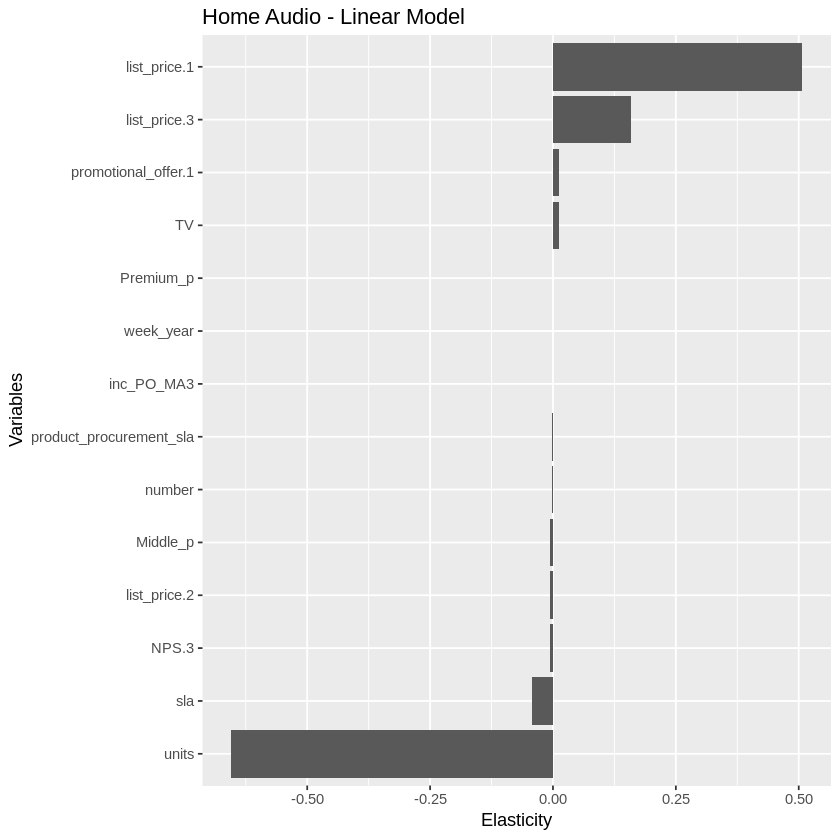

In [5]:
# Elasticity Analysis
train <- Linear_model
hrlm<-Linear_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs)


print(ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Home Audio - Linear Model") +xlab("Variables"))


### Multiplicative Model

In [6]:
multi <-data
multi <- multi[,-c(20:28)]
multi$number[which(multi$number==0)] <- 0.01
multi$Content.Marketing[which(multi$Content.Marketing==0)] <- 0.01
multi$per_order[which(multi$per_order==0)] <- 0.01
multi$TV[which(multi$TV==0)] <- 0.01
multi <- log(multi)
## First model ##
multi_model <- lm(gmv~.,multi)
print(summary(multi_model))


Call:
lm(formula = gmv ~ ., data = multi)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0026707 -0.0008484  0.0001297  0.0007391  0.0028228 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.305e-01  5.546e-01   1.497 0.150698    
week_year               -6.778e-03  4.366e-03  -1.553 0.137005    
list_price               9.949e-01  3.251e-02  30.601  < 2e-16 ***
product_mrp             -4.183e-03  3.607e-02  -0.116 0.908885    
units                    9.115e-01  2.172e-01   4.197 0.000489 ***
sla                     -1.121e-02  8.754e-03  -1.280 0.215840    
promotional_offer        2.164e-03  2.700e-02   0.080 0.936968    
number                   6.256e-05  1.731e-04   0.361 0.721741    
Total.Investment        -2.477e-02  1.642e-02  -1.508 0.147983    
TV                       5.783e-03  5.361e-03   1.079 0.294237    
Digital                 -3.667e-03  4.472e-03  -0.820 0.422428    
Sponsorship   

Model Selection

In [7]:
library(car)
library(MASS)

all_vifs <- vif(multi_model)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 1.1)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=multi)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

Multi_Final_model <- selectedMod
print(summary(Multi_Final_model))



Call:
lm(formula = myForm, data = multi)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.104427 -0.027566  0.003787  0.025118  0.132148 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.763481   1.335025   4.317 9.76e-05 ***
week_year     0.005623   0.010883   0.517  0.60816    
units         3.910018   2.614020   1.496  0.14237    
number        0.006735   0.002987   2.255  0.02956 *  
list_price.1  0.433591   0.134386   3.226  0.00246 ** 
list_price.3 -0.188238   0.132965  -1.416  0.16441    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04966 on 41 degrees of freedom
Multiple R-squared:  0.3302,	Adjusted R-squared:  0.2485 
F-statistic: 4.042 on 5 and 41 DF,  p-value: 0.004492



k-fold Cross Validation

In [8]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val1 <- train(myForm, data = multi, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val1)

Linear Regression 

47 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 42, 42, 41, 43, 41, ... 
Resampling results:

  RMSE        Rsquared   MAE       
  0.04600287  0.4989106  0.03779395

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

      Variable   Elasticity direction
1    week_year  0.002309590  Positive
2        units  0.003562152  Positive
3       number -0.002628086  Negative
4 list_price.1  0.433272069  Positive
5 list_price.3 -0.188052892  Negative


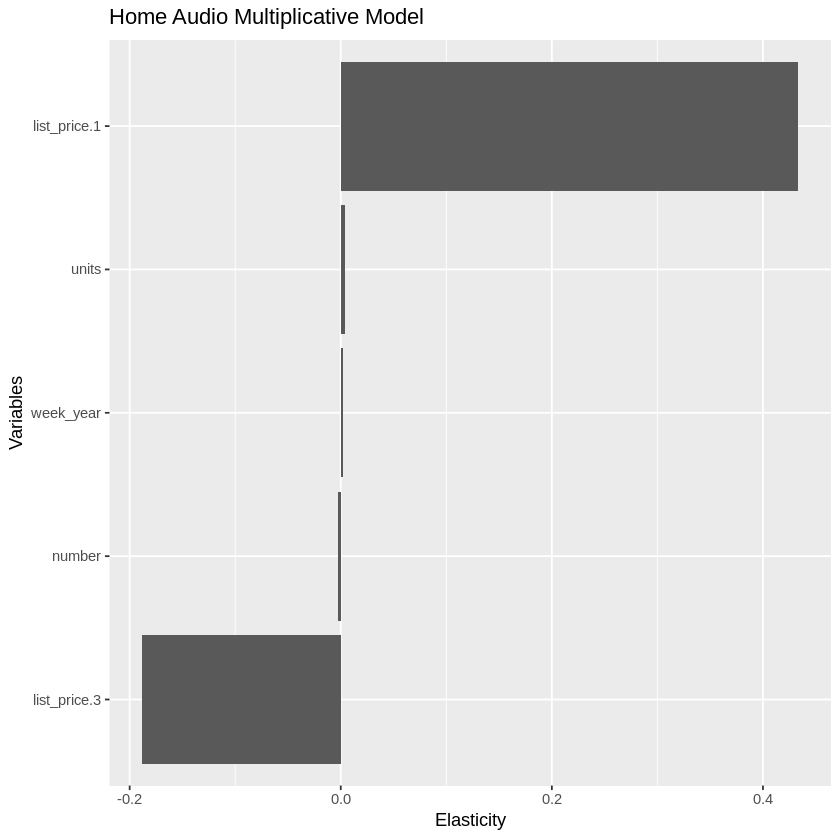

In [9]:
# Elasticity Analysis
train1 <- multi
hrlm1<-Multi_Final_model
# estimating the elasticity coefficients
elasticity1 <- function(var){
  
  elax2 <-as.numeric(hrlm1$coefficients[var]*mean(train1[,var])/mean(train1$gmv))
  
  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm1$coefficients)){
  
  var_list[i-1] <-elasticity1(names(hrlm1$coefficients)[i])
  
}

elasticity.outputs1 <- data.frame(names(hrlm1$coefficients[2:length(hrlm1$coefficients)]))
elasticity.outputs1 <- cbind(elasticity.outputs1,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs1) <- c("Variable","Elasticity")

elasticity.outputs1$direction <- ifelse(elasticity.outputs1$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs1)


ggplot(data=elasticity.outputs1, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Home Audio Multiplicative Model") +xlab("Variables")


### Kyock Model

In [10]:
library(DataCombine)
Home_koyck<-data
#gmv Lag 1
Home_Koyck<-slide(Home_koyck,Var="gmv",slideBy =-1)
Home_Koyck<-na.omit(Home_koyck)
Home_Koyck<-scale(Home_koyck)
Home_Koyck<-data.frame(Home_koyck)

# Build Kyock model
Koy_model <- lm(gmv~.,Home_koyck)
print(summary(Koy_model))




Remember to put Home_koyck in time order before running.

Lagging gmv by 1 time units.




Call:
lm(formula = gmv ~ ., data = Home_koyck)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5272 -1.1002  0.1961  1.2865  3.4456 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.887e+02  6.326e+02  -0.456  0.65790    
week_year               -1.563e+00  6.372e-01  -2.453  0.03405 *  
list_price               1.379e+00  2.060e-01   6.695  5.4e-05 ***
product_mrp             -2.495e-02  2.184e-02  -1.142  0.27992    
units                    1.628e+03  4.745e+02   3.430  0.00643 ** 
sla                     -2.294e+00  4.036e+00  -0.568  0.58234    
promotional_offer       -1.334e+02  7.562e+02  -0.176  0.86348    
number                   8.915e-01  1.083e+00   0.823  0.42963    
Total.Investment        -6.832e+00  2.221e+00  -3.076  0.01172 *  
TV                       4.113e+01  1.301e+01   3.160  0.01015 *  
Digital                 -3.115e+01  1.561e+01  -1.995  0.07400 .  
Sponsorship              3.052e+00  1.2

In [11]:
all_vifs <- vif(Koy_model)
 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Home_koyck)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

kyock_Final_model <- selectedMod
summary(kyock_Final_model)


Call:
lm(formula = myForm, data = Home_koyck)

Residuals:
     Min       1Q   Median       3Q      Max 
-222.147  -55.823   -2.892   54.271  170.262 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -6.108e+03  6.372e+03  -0.959  0.34490   
week_year                9.934e-02  1.158e+00   0.086  0.93215   
units                    8.647e+03  6.151e+03   1.406  0.16942   
sla                     -4.788e+01  2.380e+01  -2.011  0.05279 . 
number                   1.571e+01  1.244e+01   1.262  0.21593   
TV                      -1.392e+01  7.024e+00  -1.981  0.05619 . 
product_procurement_sla -1.522e+01  9.346e+01  -0.163  0.87166   
Middle_p                -5.418e+00  4.018e+00  -1.348  0.18701   
Premium_p                2.457e+01  4.915e+01   0.500  0.62054   
inc_PO_MA3               4.088e+02  2.512e+02   1.628  0.11341   
list_price.1             4.161e-01  1.486e-01   2.801  0.00858 **
list_price.2             2.887e-02  1.604e

k-fold Cross Validation

In [12]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val2 <- train(myForm, data = Home_koyck, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val2)

Linear Regression 

47 samples
14 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 42, 42, 41, 43, 41, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  121.6255  0.4858062  106.3974

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

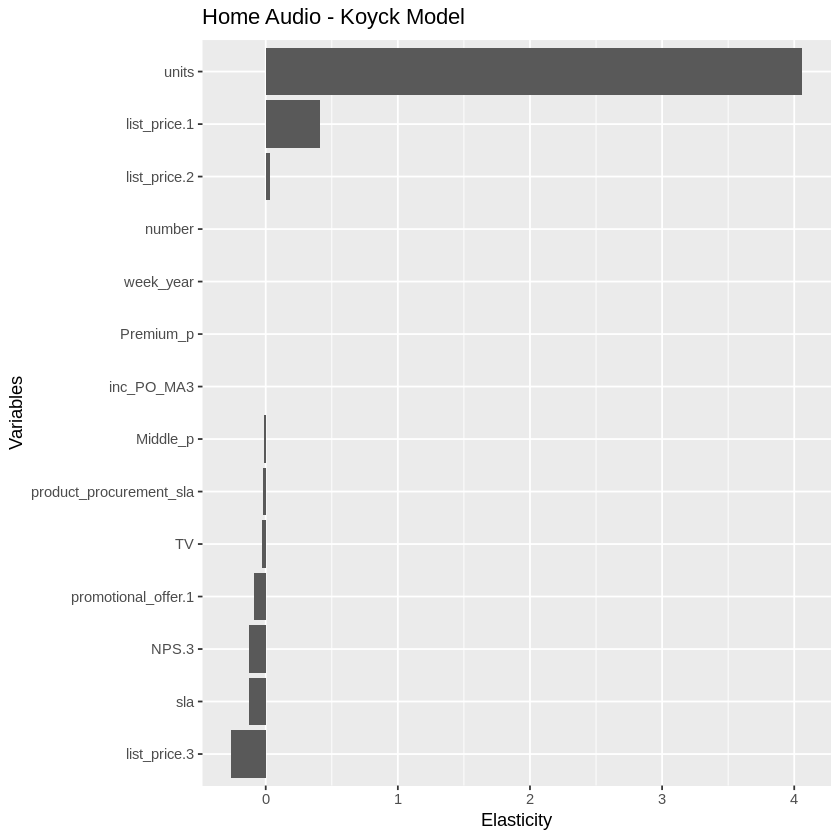

In [13]:
# Elasticity Analysis
train2 <- Home_koyck
hrlm2<-kyock_Final_model
# estimating the elasticity coefficients
elasticity2 <- function(var){
  
  elax2 <-as.numeric(hrlm2$coefficients[var]*mean(train2[,var])/mean(train2$gmv))

  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm2$coefficients)){
  
  var_list[i-1] <-elasticity2(names(hrlm2$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm2$coefficients[2:length(hrlm2$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Home Audio - Koyck Model") +xlab("Variables")

### Distributed Lag Model

In [14]:
Dis_Model <- data
Dis_model <- slide(Dis_Model, Var = "gmv",slideBy = -1)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -2)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -3)
Dis_model <- na.omit(Dis_model)
Dis_model <- scale(Dis_model)
Dis_model <- data.frame(Dis_model)

dist_model <- lm(gmv~.,Dis_model)
print(summary(dist_model))



Remember to put Dis_Model in time order before running.

Lagging gmv by 1 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 2 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Dis_model)

Residuals:
         4          5          6          7          8          9         10 
-0.0089849 -0.0015846  0.0185239  0.0102426 -0.0130899 -0.0131749  0.0078968 
        11         12         13         14         15         16         17 
-0.0003634 -0.0093205  0.0045058  0.0047465  0.0022559  0.0011768 -0.0120317 
        18         19         20         21         22         23         24 
 0.0030175  0.0084449  0.0024325  0.0021930 -0.0014463 -0.0072724  0.0029550 
        25         26         27         28         29         30         31 
 0.0031023 -0.0081524  0.0074060 -0.0045866 -0.0016512  0.0007583  0.0026583 
        32         33         34         35         36         37         38 
-0.0029588  0.0027181  0.0049439  0.0007269 -0.0030764 -0.0026232  0.0004783 
        39         40         41         42         43         44         45 
 0.0023170  0.0009344 -0.0024233 -0.0001881  0.0005448 -0.0074003  0.0003299 
     

Model Selection

In [15]:
all_vif <- vif(dist_model)
signif_all <- names(all_vif)

 while(any(all_vif > 2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Dis_model)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

Distributed_Final_model <- selectedMod
print(summary(Distributed_Final_model))



Call:
lm(formula = myForm, data = Dis_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5503 -0.4852  0.0352  0.5152  1.0770 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.058e-14  1.149e-01   0.000  1.00000   
week_year               -1.426e-02  1.457e-01  -0.098  0.92270   
units                    2.128e-01  1.536e-01   1.386  0.17633   
sla                     -3.360e-01  1.468e-01  -2.290  0.02949 * 
number                   1.099e-01  1.340e-01   0.820  0.41868   
TV                      -3.375e-01  1.504e-01  -2.243  0.03270 * 
product_procurement_sla -1.688e-02  1.572e-01  -0.107  0.91524   
Middle_p                -2.669e-01  1.551e-01  -1.721  0.09594 . 
Premium_p                6.510e-02  1.254e-01   0.519  0.60754   
Mass_p                   1.593e-01  1.605e-01   0.993  0.32907   
inc_PO_MA1               2.017e-01  1.497e-01   1.348  0.18825   
list_price.3            -2.699e-01  1.331e-01  -2.028

K-FOLD CROSS VALIDATION

In [16]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Dis_model , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Linear Regression 

44 samples
14 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 40, 39, 39, 40, 40, 39, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.9826056  0.3308059  0.833344

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

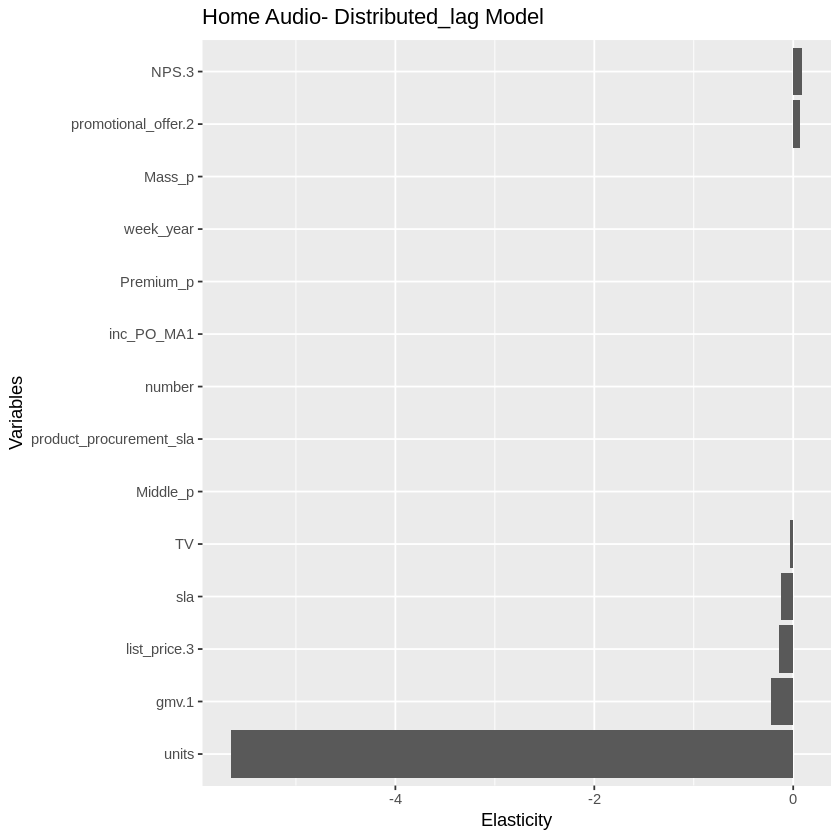

In [17]:
# Elasticity Analysis
train <- Dis_model
hrlm<-Distributed_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <- elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Home Audio- Distributed_lag Model") +xlab("Variables")

### Multiplicative + distributed model:

In [18]:
Multi_dist <-data[,-c(20:28)]
Multi_Dis_model_1 <- slide(Multi_dist, Var = "gmv",slideBy = -1)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -2)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -3)
Multi_dist <- na.omit(Multi_Dis_model_1)

Multi_dist$Content.Marketing[which(Multi_dist$Content.Marketing==0)] <-1
Multi_dist$per_order[which(Multi_dist$per_order==0)] <-0.01
Multi_dist$number[which(Multi_dist$number==0)] <-0.01
Multi_dist$TV[which(Multi_dist$TV==0)] <-0.01
Multi_dist <- log(Multi_dist)

distMulti <- lm(gmv~., Multi_dist)
print(summary(distMulti))



Remember to put Multi_dist in time order before running.

Lagging gmv by 1 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 2 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Multi_dist)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.956e-03 -5.626e-04  2.682e-05  6.345e-04  1.564e-03 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.7059763  0.6619319   1.067  0.30559    
week_year               -0.0083718  0.0059704  -1.402  0.18427    
list_price               1.0031507  0.0322337  31.121 1.36e-13 ***
product_mrp             -0.0150032  0.0324400  -0.462  0.65138    
units                    1.0062954  0.3270518   3.077  0.00883 ** 
sla                     -0.0124429  0.0087452  -1.423  0.17834    
promotional_offer        0.0104628  0.0235585   0.444  0.66426    
number                   0.0000462  0.0001881   0.246  0.80988    
Total.Investment        -0.0395854  0.0234697  -1.687  0.11550    
TV                       0.0131862  0.0083233   1.584  0.13715    
Digital                 -0.0037763  0.0042792  -0.882  0.39355    
Sponsorsh

In [19]:
all_vif <- vif(distMulti )
signif_all <- names(all_vif)

 while(any(all_vif > 1.2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Multi_dist)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

DistributedMulti_Final_model <- selectedMod
summary(DistributedMulti_Final_model)


Call:
lm(formula = myForm, data = Multi_dist)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103730 -0.033682  0.001658  0.029143  0.112019 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.500776   1.041846   4.320 0.000112 ***
number                   0.006984   0.003131   2.231 0.031848 *  
Digital                  0.014501   0.010866   1.334 0.190208    
product_procurement_sla -0.136387   0.088525  -1.541 0.131911    
per_order                0.011273   0.019274   0.585 0.562178    
list_price.1             0.410136   0.134050   3.060 0.004109 ** 
promotional_offer.1     -0.171544   0.079890  -2.147 0.038393 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0498 on 37 degrees of freedom
Multiple R-squared:  0.3846,	Adjusted R-squared:  0.2848 
F-statistic: 3.853 on 6 and 37 DF,  p-value: 0.004379


k-fold CROSS VALIDATION

In [20]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Multi_dist , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Linear Regression 

44 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 40, 39, 39, 40, 40, 39, ... 
Resampling results:

  RMSE        Rsquared   MAE       
  0.05547827  0.3324297  0.04667767

Tuning parameter 'intercept' was held constant at a value of TRUE


#### ELASTICITY ANALYSIS

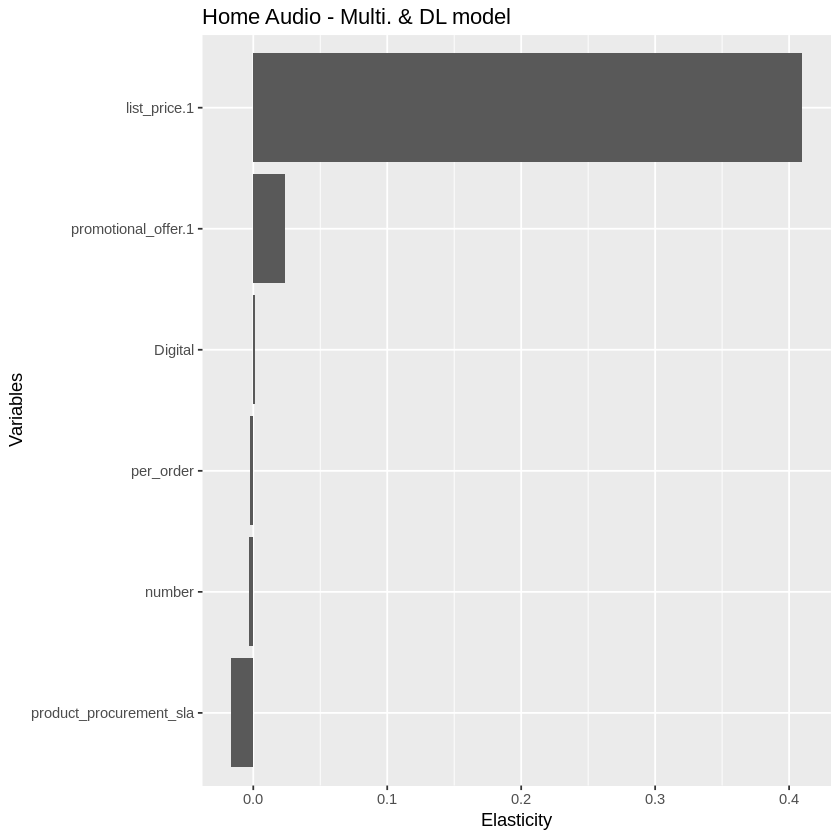

In [21]:
# estimating the elasticity coefficients
train <- Multi_dist

grlm <-DistributedMulti_Final_model 
elasticity <- function(var){
  
  elax1 <-as.numeric(grlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 

var_list <- list()

for(i in 2:length(grlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(grlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(grlm$coefficients[2:length(grlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Home Audio - Multi. & DL model") +xlab("Variables")
